# Fireforest Dataset

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
FF=pd.read_csv('forestfires.csv')
FF

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [4]:
FF = FF.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<AxesSubplot:ylabel='size_category'>

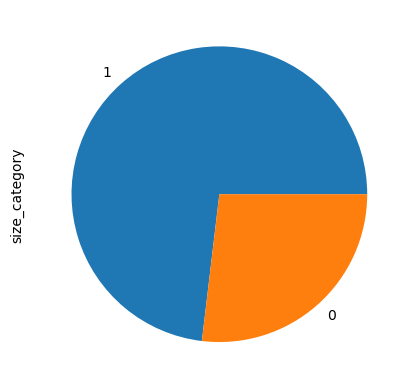

In [5]:
FF['size_category'].value_counts().plot(kind='pie')

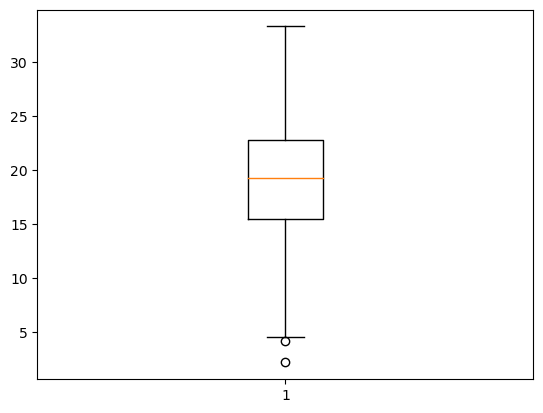

In [6]:
plt.boxplot(FF['temp'])
plt.show()

In [7]:
X=FF.iloc[:,:-1]
Y=FF['size_category'].values.ravel()

In [8]:
model = Sequential()
model.add(Dense(12, input_dim=30,  activation='relu')) 
model.add(Dense(8,  activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [11]:
FF.shape

(517, 31)

In [12]:
nn = model.fit(X, Y, validation_split=0.2, epochs=250, batch_size=10)

Epoch 1/250
42/42 [==============================] - 2s 14ms/step - loss: 6.3126 - accuracy: 0.6053 - val_loss: 3.4016 - val_accuracy: 0.7404
Epoch 2/250
42/42 [==============================] - 0s 4ms/step - loss: 2.1489 - accuracy: 0.6828 - val_loss: 2.4653 - val_accuracy: 0.7885
Epoch 3/250
42/42 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.8910 - val_loss: 0.6492 - val_accuracy: 0.8365
Epoch 4/250
42/42 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.9177 - val_loss: 0.5433 - val_accuracy: 0.8654
Epoch 5/250
42/42 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9298 - val_loss: 0.1951 - val_accuracy: 0.9231
Epoch 6/250
42/42 [==============================] - 0s 4ms/step - loss: 0.1612 - accuracy: 0.9467 - val_loss: 0.2719 - val_accuracy: 0.8846
Epoch 7/250
42/42 [==============================] - 0s 4ms/step - loss: 0.1505 - accuracy: 0.9419 - val_loss: 0.2989 - val_accuracy: 0.8942
Epoch 8/250


In [13]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9903
accuracy: 99.03%


In [14]:
nn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

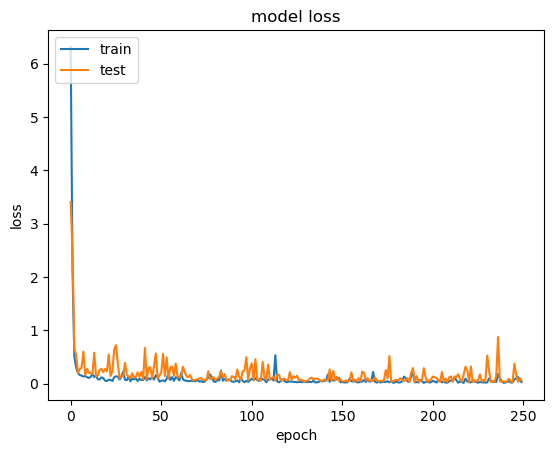

In [15]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Gas Turbine Dataset


In [16]:
GT=pd.read_csv('gas_turbines.csv')
GT

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [17]:
GT.describe(include='all')

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [18]:
GT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


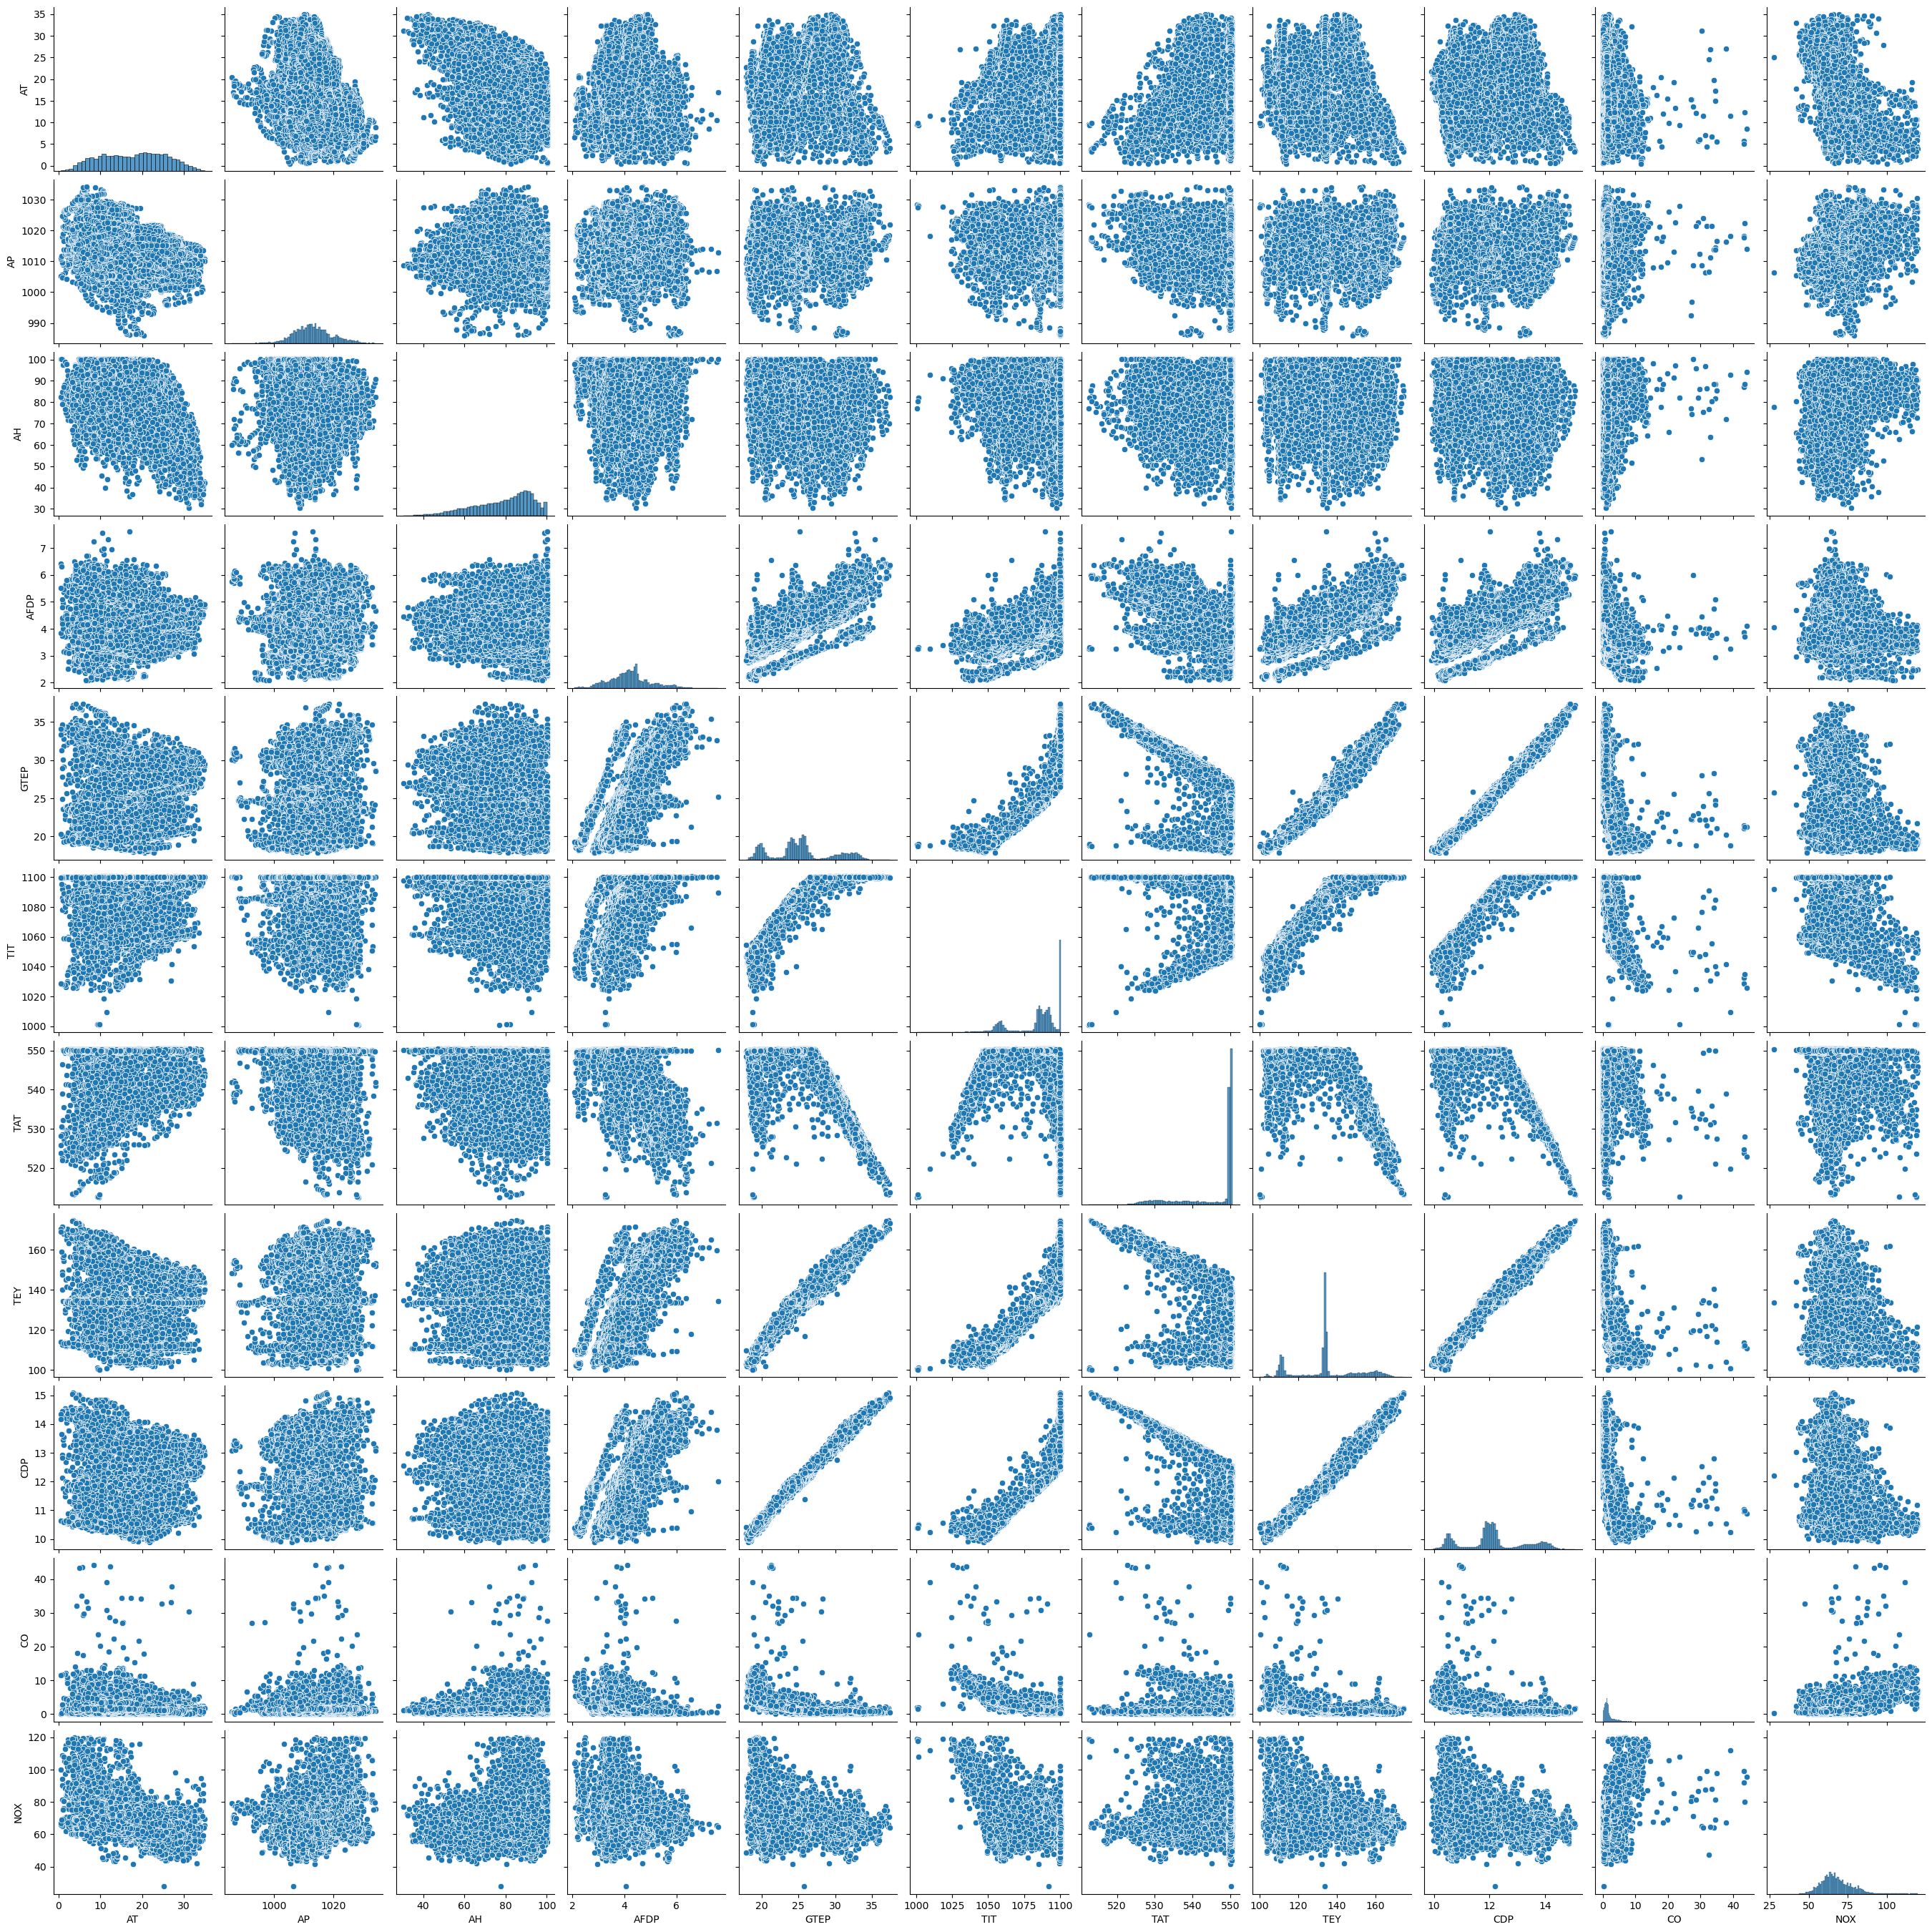

In [19]:
sns.pairplot(GT)
plt.show()

In [20]:
GT['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [21]:
print("Mean of Turbine Energy Yield is: ", GT['TEY'].mean())
print("Median of Turbine Energy Yield is: ", GT['TEY'].median())

Mean of Turbine Energy Yield is:  134.18846399361655
Median of Turbine Energy Yield is:  133.78


In [22]:
tey = []
for i in GT['TEY']:
    if i>=133.78:
        tey.append(1)
    else:
        tey.append(0)
GT['tey'] = tey

In [23]:
GT.drop('TEY', axis = 1, inplace = True)
GT.rename({'tey': 'TEY'},axis = 1, inplace = True)

<AxesSubplot:ylabel='TEY'>

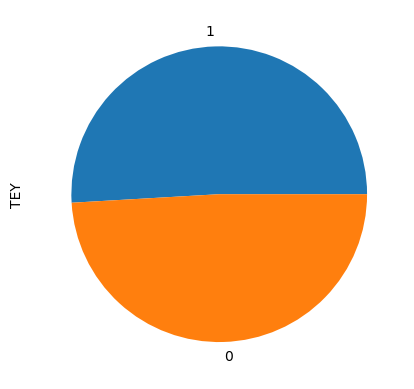

In [24]:
GT.TEY.value_counts().plot(kind='pie')

In [25]:
GT.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   
TEY  -0.049689  0.067726 -0.135535  0.490736  0.697080  0.667879 -0.461348   

           CDP        CO       NOX       TEY  
AT   -0.100705 -0.088588 -0.600006 -0.049689  
AP    0.131198  0.041614  0.256744  0.067726  
AH   -0.182010  0.165505  0.143061 -0.135535  
AFDP  0.727152 -0.334207 -0.037299  0.490736  
GTEP  0.993784 -0.508259 -0.208496  0.697080  
TIT   0.887238 -0.688272 -0.231636  0.667879  
TAT  -0.744740  0.063404  0.009888 -0.461348  
CDP   1.000000 -0.520783 -0.169103  0.705370  
CO   -0.520783  1.000000  0.316743 -0.386192  
NOX  -0.169103  0.316743  1.000000 -0.079604  
TEY   0.705370 -0.386192 -0.079604  1.000000

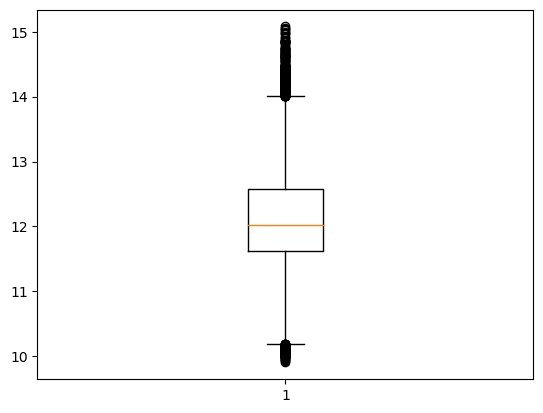

In [26]:
plt.boxplot(GT['CDP'])
plt.show()

In [27]:
x=GT.drop(columns=['TEY'])
y=GT['TEY']

In [28]:
x

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64

In [30]:
model1 = Sequential()
model1.add(Dense(20, input_dim=10,  activation='relu'))
model1.add(Dense(10,  activation='relu')) 
model1.add(Dense(10,  activation='relu')) 
model1.add(Dense(1, activation='sigmoid')) 

In [31]:
GT.shape

(15039, 11)

In [32]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [34]:
NN = model1.fit(X_standardized, y, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
1204/1204 [==============================] - 5s 3ms/step - loss: 0.3329 - accuracy: 0.8316 - val_loss: 0.2673 - val_accuracy: 0.8531
Epoch 2/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.2209 - accuracy: 0.8959 - val_loss: 0.2190 - val_accuracy: 0.8959
Epoch 3/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.2098 - accuracy: 0.9049 - val_loss: 0.2727 - val_accuracy: 0.8813
Epoch 4/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.2060 - accuracy: 0.9044 - val_loss: 0.2865 - val_accuracy: 0.8840
Epoch 5/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.2031 - accuracy: 0.9067 - val_loss: 0.2480 - val_accuracy: 0.8813
Epoch 6/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.2014 - accuracy: 0.9072 - val_loss: 0.2981 - val_accuracy: 0.8793
Epoch 7/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.1984 - accuracy: 0.9097 - val_loss: 0.2780 - val_ac

In [35]:
scores = model1.evaluate(X_standardized, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.1968 - accuracy: 0.9205
accuracy: 92.05%


In [36]:
NN.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

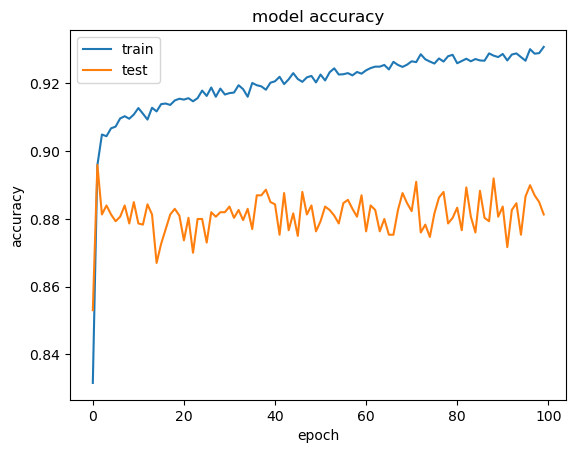

In [37]:

plt.plot(NN.history['accuracy'])
plt.plot(NN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()